# Разделимость данных

Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта
1. Примените алгоритм кластеризации к спроецированным данным. Расчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции
1. Опишите результаты 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
nba = pd.read_csv('data/nba2k20-full.csv')

num_height = nba['height'].str[-5:].astype(float)
num_weight = nba['weight'].apply(lambda x: x[x.index('/') + 1: -3]).astype(float)
num_salary = nba['salary'].str[1:].astype(float)
nba_slice = pd.DataFrame({'height': num_height, 'weight': num_weight, 'salary': num_salary})

In [36]:
def rate_player(rank: int) -> str:
    if rank > 75:
        return 1
    else:
        return 0

In [37]:
target = nba['rating'].apply(lambda x: rate_player(x))

In [38]:
!pip install umap-learn

**Важные параметры.**
1. *Число соседей — n_neighbors.* Варьируя этот параметр, можно выбирать, что важнее сохранить в новом пространственном представлении данных: глобальную или локальную структуру данных. Маленькие значения параметра означают, что, пытаясь оценить пространство, в котором распределены данные, алгоритм ограничивается малой окрестностью вокруг каждой точки, то есть пытается уловить локальную структуру данных (возможно в ущерб общей картине). С другой стороны большие значения n_neighbors заставляют UMAP учитывать точки в большей окрестности, сохраняя глобальную структуру данных, но упуская детали.

+ С количеством соседей, равным единице, алгоритм работает просто ужасно, поскольку слишком сильно фокусируется на деталях и попросту не может уловить общую структуру данных.
+ С ростом количества соседей модель все меньше внимания уделяет различиям между разными видами одежды, группируя похожие и смешивая их между собой. В то же время абсолютно разные предметы гардероба становятся все дальше друг от друга. Как уже было сказано, общая картина становится ясней, а детали размываются.

2. *Минимальное расстояние — min_dist.* Данный параметр стоит понимать буквально: он определяет минимальное расстояние, на котором могут находиться точки в новом пространстве. Низкие значения стоит применять в случае, если вас интересует, на какие кластеры разделяются ваши данные, а высокие — если вам важнее взглянуть на структуру данных, как единого целого. Увеличение значения параметра приводит к меньшей "степени кластеризации", данные собираются в кучу и различия между ними стираются. Интересно, что при минимальном значении min_dist алгоритм пытается найти различия внутри кластеров и разделить их на еще более мелкие группы.

In [39]:
import umap

X = nba_slice
y = target

reducer = umap.UMAP(n_neighbors=100, min_dist = 0.4, n_components=2, random_state=42)
reducer.fit(X)

UMAP(min_dist=0.4, n_neighbors=100, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [40]:
X_reduced = reducer.transform(X)

X_reduced.shape

(429, 2)

Projecting 3-dimensional data to 2D


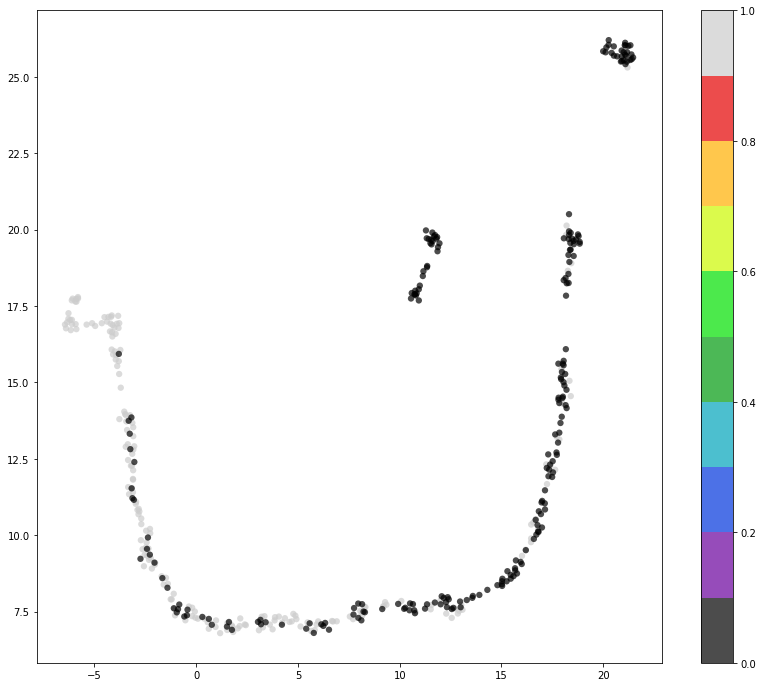

In [41]:
print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(14,12))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

In [42]:
from sklearn.cluster import KMeans

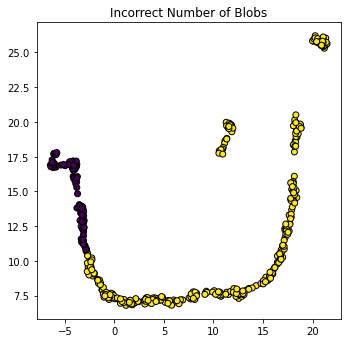

In [43]:
plt.figure(figsize=(12, 12))

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X)

plt.subplot(221)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, edgecolor='k')
plt.title("Incorrect Number of Blobs")

plt.show()

In [44]:
def get_internal(x, y, cnt_class):
    inClass = 0
    inClass_cnt = 0
    outOfClass = 0
    outOfClass_cnt = 0
    for i in range(x.shape[0]):
        for j in range(i + 1, x.shape[0]):
            if y[i] == y[j]:
                inClass += np.linalg.norm(x[i]-x[j])
                inClass_cnt += 1
            else:
                outOfClass += np.linalg.norm(x[i]-x[j])
                outOfClass_cnt += 1
    print("Внутрекласторное расстояние : {}".format(inClass/inClass_cnt))
    print("Межкласторное расстояние : {}".format(outOfClass/outOfClass_cnt))

In [45]:
get_internal(X_reduced, y_pred, 2)
get_internal(X_reduced, y, 2)

Внутрекласторное расстояние : 11.094064787335125
Межкласторное расстояние : 16.991694985237146
Внутрекласторное расстояние : 10.838845461645285
Межкласторное расстояние : 15.207099360963593


PCA:

In [46]:
from __future__ import division, print_function
from sklearn.decomposition import PCA

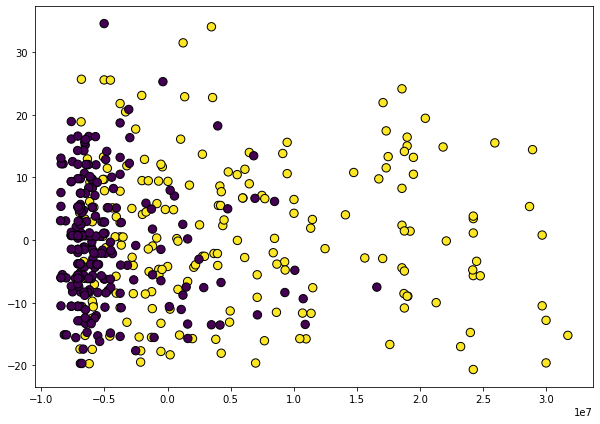

In [47]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, edgecolor="k")
plt.show()

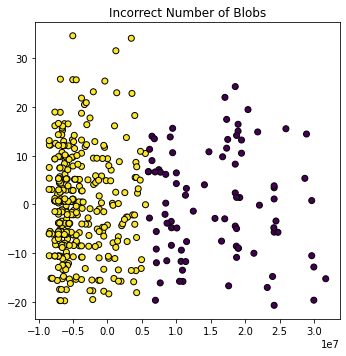

In [48]:
plt.figure(figsize=(12, 12))

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X)

plt.subplot(221)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, edgecolor='k')
plt.title("Incorrect Number of Blobs")

plt.show()

In [49]:
get_internal(X_reduced, y_pred, 2)
get_internal(X_reduced, y, 2)

Внутрекласторное расстояние : 4085115.303565506
Межкласторное расстояние : 19840236.94355198
Внутрекласторное расстояние : 7133835.737275982
Межкласторное расстояние : 11338222.633728113


from sklearn.manifold import TSNETSNE:

In [50]:
from sklearn.manifold import TSNE

Projecting 3-dimensional data to 2D


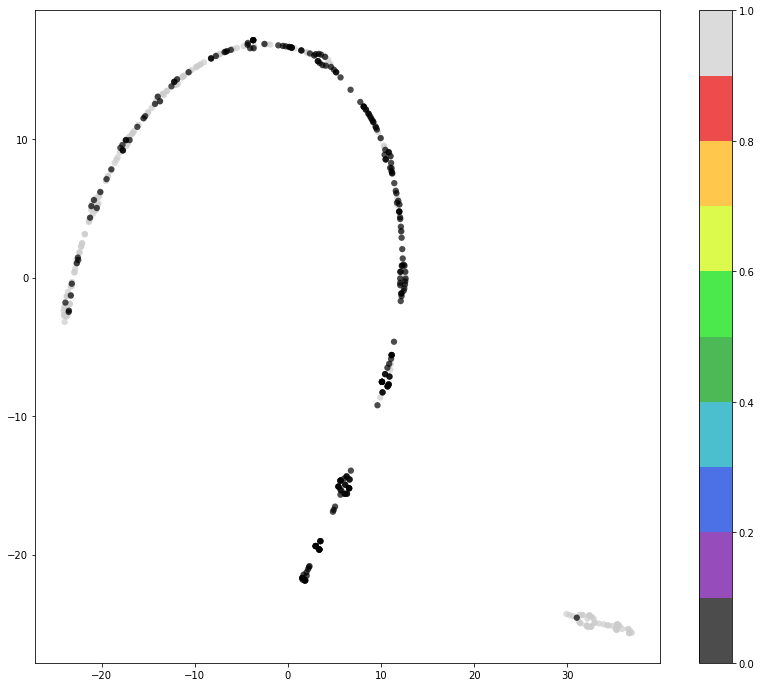

In [51]:
tsne = TSNE(n_components=2, random_state=0)

X_reduced = tsne.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(14,12))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

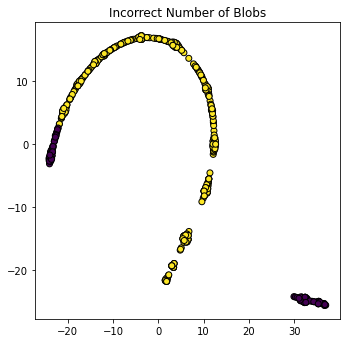

In [52]:
plt.figure(figsize=(12, 12))

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X) ## На чем лучше обучать, на X или X_reduced

plt.subplot(221)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, edgecolor='k')
plt.title("Incorrect Number of Blobs")

plt.show()

In [53]:
get_internal(X_reduced, y_pred, 2)
get_internal(X_reduced, y, 2)

Внутрекласторное расстояние : 21.042722051654806
Межкласторное расстояние : 37.388558669815744
Внутрекласторное расстояние : 24.704951954077384
Межкласторное расстояние : 28.06802765083763
